## User Input

### Gather User Input

Assumptions:
1. User can input coordinates that respresent a region of interest ROI
2. User can input names for common locations (countries, cities, states etc)
3. The shape of the user input will be a four sided polygon (for now do not worry about multisided polygons)

In [ ]:
pip install turfpy

Libraries

In [7]:
import cartopy.crs as ccrs
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import planetary_computer
import pystac_client
import xarray as xr
import geopandas as gpd

In [8]:
planetary_computer.set_subscription_key("c27669c4bdec434d804e2bd738cb16fc")
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
print(catalog)

<Client id=microsoft-pc>


GeoJSON 

In [9]:
#longitude = 79.109
#latitude = 22.746

#GeoJSON - East Melbourne (square)
geometry = {
    "type": "Polygon",
    "coordinates": [    \
        [
            [-37.7528,145.096],
            [-37.75415,144.85276],
            [-37.92253,144.84092],
            [-37.92551,145.09532],
            [-37.7528,145.096],
        ]
    ],
}


In [10]:
import json
from turfpy.measurement import bbox_polygon, bbox
from geojson import Polygon

#Bounding box - Swinburne University Hawthorn campus (square)
#minLat: -37.822978
#minLon: 145.037186
#maxLat: -37.821866
#maxLon: 145.038841
bbox = [-37.822978, 145.037186, -37.821866, 145.038841]
print(json.dumps(bbox_polygon(bbox), indent=2, sort_keys=True))#json.dumps() function will convert a subset of Python objects into a json string.


{
  "geometry": {
    "coordinates": [
      [
        [
          -37.822978,
          145.037186
        ],
        [
          -37.821866,
          145.037186
        ],
        [
          -37.821866,
          145.038841
        ],
        [
          -37.822978,
          145.038841
        ],
        [
          -37.822978,
          145.037186
        ]
      ]
    ],
    "type": "Polygon"
  },
  "properties": {},
  "type": "Feature"
}


Date and Time

In [11]:
from datetime import datetime, time

# Function to convert date format 
def convert_format_date(input_date, input_format, output_format):
    date_obj = datetime.strptime(input_date, input_format)
    formatted_date = date_obj.strftime(output_format)
    return formatted_date

# User Input Date and time
user_start_date = "01 09 2023"
user_end_date = "01-September-2023"

user_start_time = time(14,30,0)
user_end_time = time(15,00,0)

# Define input and output date formats
input_format = "%d %m %Y"
output_format = "%d/%m/%Y"

# Convert user start date format
user_start_date1 = convert_format_date(user_start_date, input_format, output_format)
print(user_start_date1)

# Convert user end date format
input_format = "%d-%B-%Y" #%B Month as locale's full name, %b Month as locale's abbreviated name
user_end_date1 = convert_format_date(user_end_date, input_format, output_format)
print(user_end_date1)

print(user_start_time)
print(user_end_time)

01/09/2023
01/09/2023
14:30:00
15:00:00


Location

In [12]:
#name
user_countries = "Australia" 

user_cities = "Melbourne"

#user_states = "Victoria"

#continent
user_continent = "Oceania"

In [13]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
specific_city = capitals[capitals['name'] == user_cities]

capitals

C:\Users\jenni\AppData\Local\Temp\ipykernel_13960\4260778042.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\jenni\AppData\Local\Temp\ipykernel_13960\4260778042.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)
...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.21255 -33.87137)
241,Singapore,POINT (103.85387 1.29498)


<Axes: >

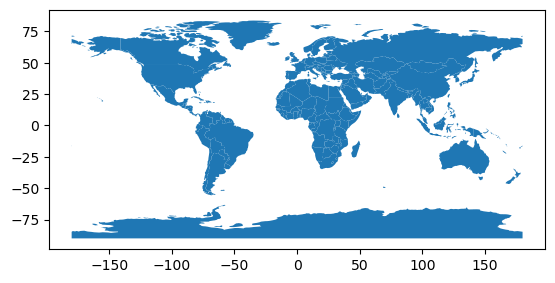

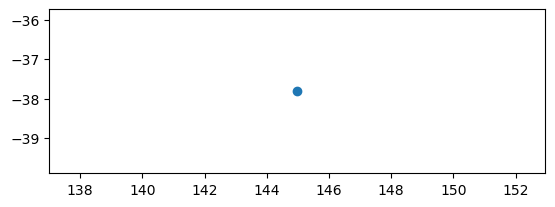

In [14]:
world_data.plot()
specific_city.plot()

C:\Users\jenni\AppData\Local\Temp\ipykernel_13960\781531187.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

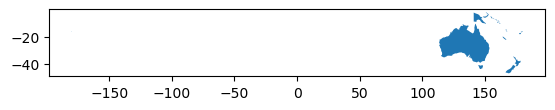

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
australia = world[world['continent'] == user_continent]
australia.plot()

C:\Users\jenni\AppData\Local\Temp\ipykernel_13960\584131818.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

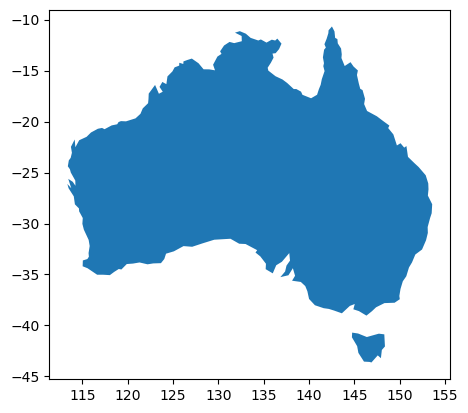

In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
australia = world[world['name'] == user_countries]
australia.plot()

### Testing 
unittest — Unit testing framework

GeoJSON Unit Testing

In [20]:
import unittest

class TestGeometry(unittest.TestCase):
    def test_geometry(self, geometry):
        
    


SyntaxError: expected ':' (686924659.py, line 4)

Location Unit Testing

In [ ]:
import unittest

class TestLocation(unittest.TestCase):
    def test_continent(self, user_continent):
        
        
    def test_country(self, user_countries):